In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import plotly.express as px

In [ ]:
traindata = pd.read_csv("adult1data.csv")
testdata = pd.read_csv("adult1test.csv")
columnNames = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
strColumns = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country","income"]

In [ ]:
traindata.columns = columnNames
testdata.columns = columnNames

frames = [traindata,testdata]
Alldata =  pd.concat(frames)

Alldata[strColumns] = Alldata[strColumns].apply(lambda x: x.str.strip())
Alldata.isin(['?']).sum(axis=0)

Alldata['income']= Alldata['income'].map(lambda x: x.rstrip('.'))

Alldata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48840.0,38.643857,13.710652,17.0,28.0,37.0,48.00,90.0
fnlwgt,48840.0,189665.670434,105604.834700,12285.0,117553.5,178144.5,237647.25,1490400.0
education-num,48840.0,10.078092,2.570954,1.0,9.0,10.0,12.00,16.0
capital-gain,48840.0,1079.067301,7452.168393,0.0,0.0,0.0,0.00,99999.0
capital-loss,48840.0,87.505897,403.012415,0.0,0.0,0.0,0.00,4356.0
hours-per-week,48840.0,40.422400,12.391697,1.0,40.0,40.0,45.00,99.0


In [ ]:
Analysis = Alldata.replace('?',np.nan)
Analysis.isin([np.nan]).sum(axis=0)

#Removes 3620 instances which is 7.4 % 
Analysis.dropna(how='any',inplace=True)
Analysis.info()

#drop duplicates 
Analysis = Analysis.drop_duplicates()
Analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45220 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45220 non-null  int64 
 1   workclass       45220 non-null  object
 2   fnlwgt          45220 non-null  int64 
 3   education       45220 non-null  object
 4   education-num   45220 non-null  int64 
 5   marital-status  45220 non-null  object
 6   occupation      45220 non-null  object
 7   relationship    45220 non-null  object
 8   race            45220 non-null  object
 9   sex             45220 non-null  object
 10  capital-gain    45220 non-null  int64 
 11  capital-loss    45220 non-null  int64 
 12  hours-per-week  45220 non-null  int64 
 13  native-country  45220 non-null  object
 14  income          45220 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45173 entries, 0 to 16279
Data columns (tot

In [ ]:
sex = {'Male': 0,'Female': 1} 
income = {'<=50K':0,'>50K' : 1}

Analysis.sex = [sex[item] for item in Analysis.sex] 
Analysis.income = [income[item] for item in Analysis.income] 

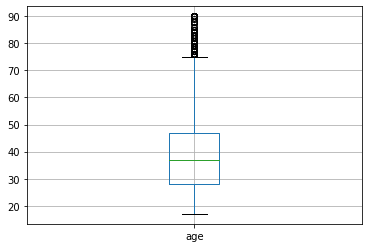

In [ ]:
boxplot = Analysis.boxplot(column=['age'])
plt.savefig('boxage.eps')

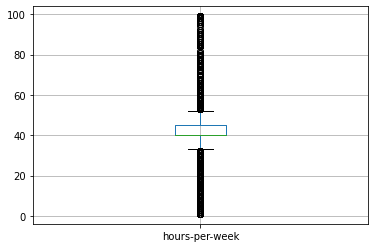

In [ ]:
boxplot = Analysis.boxplot(column=['hours-per-week'])
plt.savefig('boxhour.eps')

In [ ]:
dataAnalysis = Analysis
dataAnalysis = dataAnalysis.sort_values(by=['education-num'])


nativecountry = dataAnalysis['native-country'].unique().tolist()
nativecountryMapping = dict( zip(nativecountry,range(len(nativecountry))) )
dataAnalysis.replace({'native-country': nativecountryMapping},inplace=True)


race = dataAnalysis['race'].unique().tolist()
raceMapping = dict( zip(race,range(len(race))) )
dataAnalysis.replace({'race': raceMapping},inplace=True)


relationship = dataAnalysis['relationship'].unique().tolist()
relationshipMapping = dict( zip(relationship,range(len(relationship))) )
dataAnalysis.replace({'relationship': relationshipMapping},inplace=True)

occupation  = dataAnalysis['occupation'].unique().tolist()
occupationMapping = dict( zip(occupation ,range(len(occupation))) )
dataAnalysis.replace({'occupation': occupationMapping},inplace=True)

maritalstatus  = dataAnalysis['marital-status'].unique().tolist()
maritalstatusMapping = dict( zip(maritalstatus,range(len(maritalstatus))) )
dataAnalysis.replace({'marital-status': maritalstatusMapping},inplace=True)

education  = dataAnalysis['education'].unique().tolist()
educationMapping = dict( zip(education,range(len(education))) )
dataAnalysis.replace({'education': educationMapping},inplace=True)

workclass  = dataAnalysis['workclass'].unique().tolist()
workclassMapping = dict( zip(workclass ,range(len(workclass))) )
dataAnalysis.replace({'workclass': workclassMapping},inplace=True)

print(dataAnalysis)
dataAnalysis.iloc[0:5, 3:5]

       age  workclass  fnlwgt  ...  hours-per-week  native-country  income
1058    31          0   25610  ...              25               0   <=50K
25651   42          0  144995  ...              25               0   <=50K
24174   54          0  349340  ...              40               1   <=50K
22166   39          0  341741  ...              12               0   <=50K
7772    19          0  277695  ...              50               2   <=50K
...    ...        ...     ...  ...             ...             ...     ...
29130   58          0  320102  ...              50               0    >50K
29137   31          1   81030  ...              40               0    >50K
7042    41          0   65372  ...              50               0    >50K
6167    37          2  184112  ...              40               0    >50K
14477   47          3   80282  ...              45               0   <=50K

[45173 rows x 15 columns]


,education,education-num
1058,0,1
25651,0,1
24174,0,1
22166,0,1
7772,0,1


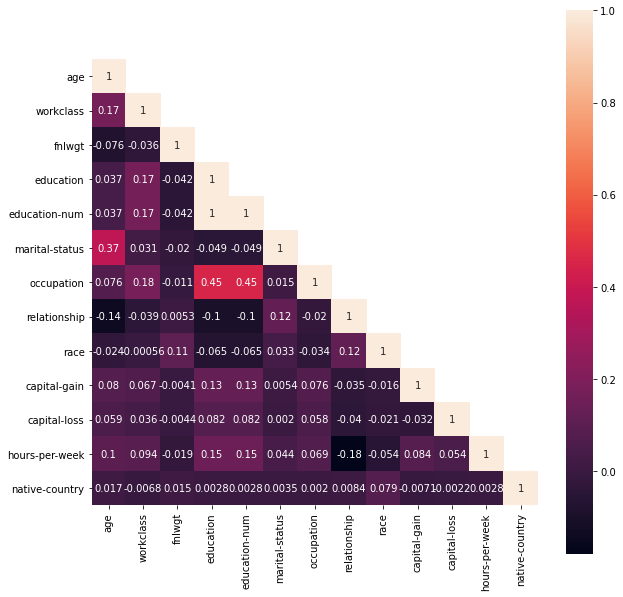

In [ ]:
corrMatrix = dataAnalysis.corr()
df_lt = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))

f, ax = plt.subplots(figsize=(10, 10))
ax = sn.heatmap(df_lt, square=True, annot=True)
f.savefig('corr.eps',bbox_inches='tight')



In [ ]:
#We get rid of education as it is a redundent column to education-num
#We also see that fnlwgt and native-country have no importance on the outcome of income so we can remove these two columns leaving only 
#age, workclass, education-num, marital-status, occupation, race, sex, capital-gain, capital-loss and hours-per-week (11 attributes)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


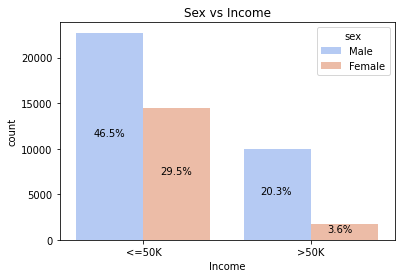

In [ ]:
ax = sn.countplot(Alldata['income'],palette='coolwarm',hue='sex',data=Alldata)

plt.title('Sex vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.savefig('age.eps', bbox_inches='tight')

In [ ]:
#It is shown that men make up around 76% of the total instantance of the dataset(therefore this attribute has class imbalance /bias) 
#From the diagram we can see men are much more likely to earn more than over 50 thousand 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


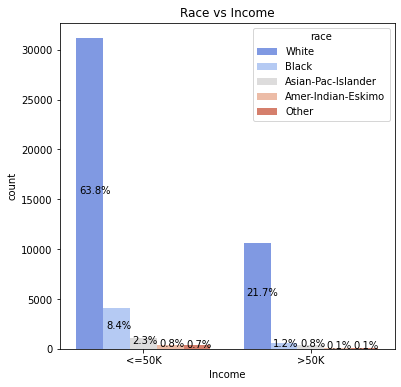

In [ ]:

plt.figure(figsize=[6,6])
ax = sn.countplot(Alldata['income'],palette='coolwarm',hue='race',data=Alldata)

plt.title('Race vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.savefig('race.eps', bbox_inches='tight')

In [ ]:
#We see that whites make up about 85.5 % of instances in the dataset this is to be expected as the cenus was done in the USA which a predomintory european.
#The next highest is black who make up about 9.6% of the instances (there is class imbalance)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


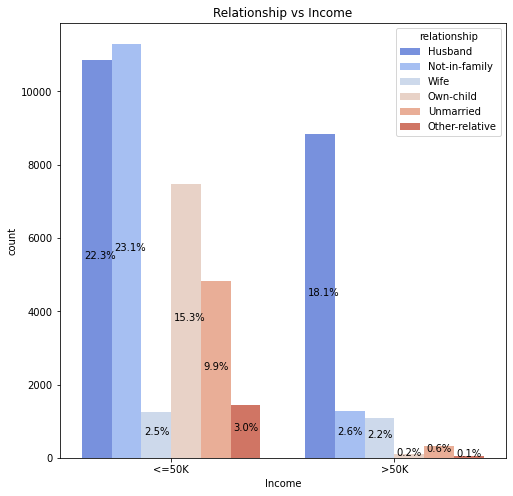

In [ ]:
plt.figure(figsize=[8,8])
ax = sn.countplot(Alldata['income'],palette='coolwarm',hue='relationship',data=Alldata)

plt.title('Relationship vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.savefig('relationship.eps', bbox_inches='tight')

In [ ]:
#It is shown that husbands are more likely to earn greater than 50 k also that people not in a family are more likely to earn less than 50 k

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



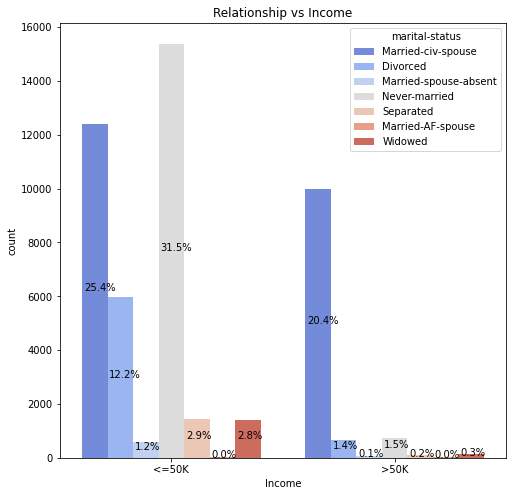

In [ ]:
plt.figure(figsize=[8,8])
ax = sn.countplot(Alldata['income'],palette='coolwarm',hue='marital-status',data=Alldata)

plt.title('Relationship vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



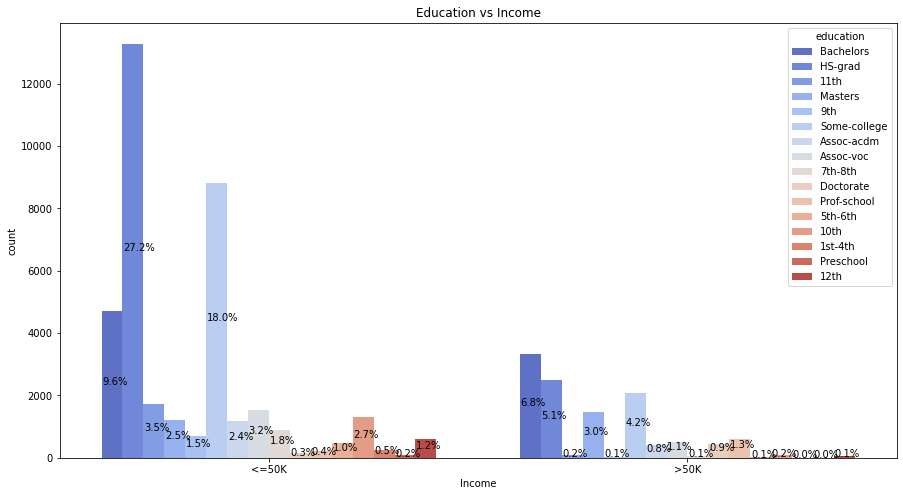

In [ ]:
plt.figure(figsize=[15,8])
ax = sn.countplot(Alldata['income'],palette='coolwarm',hue='education',data=Alldata)

plt.title('Education vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



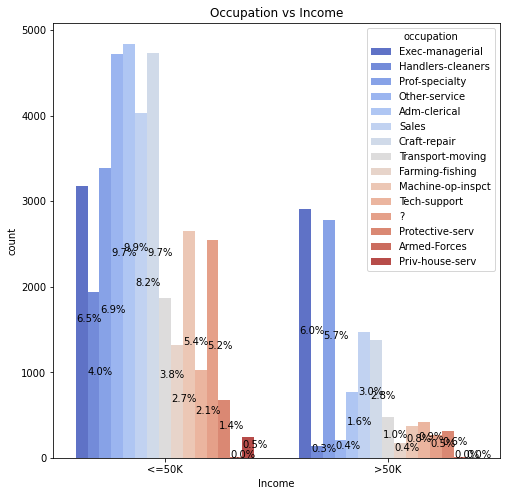

In [ ]:
plt.figure(figsize=[8,8])
ax = sn.countplot(Alldata['income'],palette='coolwarm',hue='occupation',data=Alldata)

plt.title('Occupation vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [ ]:
binData = Alldata
binData['workclass'] = binData['workclass'].replace('?',"Unknown")
binData['occupation'] = binData['occupation'].replace('?',"Unknown")
binData['native-country'] = binData['native-country'].replace('?',"Unknown")



In [ ]:
binData['workclass'].value_counts()

Private             33905
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1980
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
binData['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5610
Sales                5504
Other-service        4923
Machine-op-inspct    3021
Unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
binData['native-country'].value_counts()

United-States                 43830
Mexico                          951
Unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [ ]:
binData['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16115
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [ ]:
binData['relationship'].value_counts()

Husband           19716
Not-in-family     12582
Own-child          7580
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [ ]:
binData['income'].value_counts()

<=50K    37153
>50K     11687
Name: income, dtype: int64

In [ ]:
binData['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8024
Masters          2657
Assoc-voc        2061
11th             1811
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
#Feature engineering
binData.education = binData.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'Not-Finished-With-School')
binData['education'].value_counts()

HS-grad                     15784
Some-college                10878
Bachelors                    8024
Not-Finished-With-School     6407
Masters                      2657
Assoc-voc                    2061
Assoc-acdm                   1601
Prof-school                   834
Doctorate                     594
Name: education, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


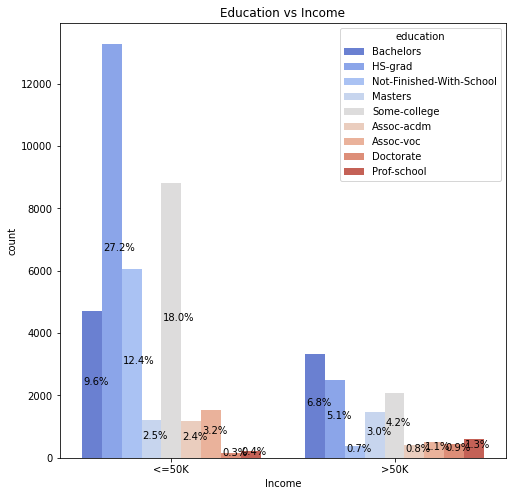

In [ ]:
plt.figure(figsize=[8,8])
ax = sn.countplot(binData['income'],palette='coolwarm',hue='education',data=Alldata)

plt.title('Education vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.savefig('education.eps', bbox_inches='tight')

In [ ]:
binData['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16115
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [ ]:
#Feature engineering
#binData['marital-status'] = binData['marital-status'].replace(['Married-AF-spouse','Married-spouse-absent','Married-civ-spouse'],'Married')
#binData['marital-status'] = binData['marital-status'].replace(['Divorced','Separated','Widowed'],'Separated')
binData['marital-status'] = binData['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Married')
binData['marital-status'] = binData['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Separated')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


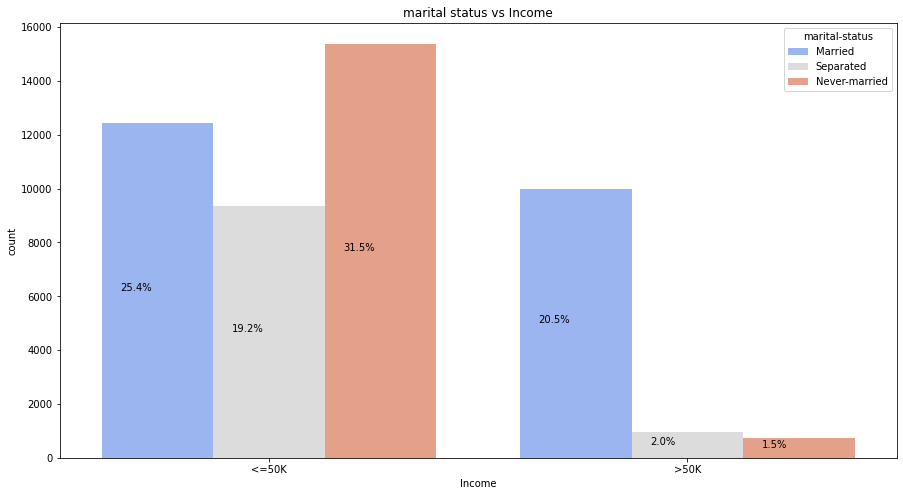

In [ ]:
plt.figure(figsize=[15,8])
ax = sn.countplot(binData['income'],palette='coolwarm',hue='marital-status',data=Alldata)

plt.title('marital status vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.savefig('marital.eps', bbox_inches='tight')

In [ ]:

binData1 = binData
binData1.describe().T
binData1.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16275,39,Private,215419,Bachelors,13,Separated,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16276,64,Unknown,321403,HS-grad,9,Separated,Unknown,Other-relative,Black,Male,0,0,40,United-States,<=50K
16277,38,Private,374983,Bachelors,13,Married,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16278,44,Private,83891,Bachelors,13,Separated,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
16279,35,Self-emp-inc,182148,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [ ]:
binData1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48840.0,38.643857,13.710652,17.0,28.0,37.0,48.00,90.0
fnlwgt,48840.0,189665.670434,105604.834700,12285.0,117553.5,178144.5,237647.25,1490400.0
education-num,48840.0,10.078092,2.570954,1.0,9.0,10.0,12.00,16.0
capital-gain,48840.0,1079.067301,7452.168393,0.0,0.0,0.0,0.00,99999.0
capital-loss,48840.0,87.505897,403.012415,0.0,0.0,0.0,0.00,4356.0
hours-per-week,48840.0,40.422400,12.391697,1.0,40.0,40.0,45.00,99.0


In [ ]:
binData1['age'] = pd.cut(binData1.age, bins=[0,25,50,75,100], labels=['age <= 25','25 < age <= 50','50 < age <= 75', '75 < age'])
binData1['hours-per-week'] = pd.cut(binData1['hours-per-week'], bins=[0,29,50,1000], labels=['hours <= 29 ','29 > hours <= 50','50 < hours'])
#binData1['capital-gain'] = pd.cut(binData1['capital-gain'], bins=[0,0,1079,np.inf], labels=['None','Low','High'])
#binData1['capital-loss'] = pd.cut(binData1['capital-loss'], bins=[0,25,50,75,100], labels=['Young','Middel-age','Senior','old'])




In [ ]:

binData1['capital-gain'] = np.where((binData1['capital-gain'] == 0),0,binData1['capital-gain'])
binData1['capital-gain'] = np.where((binData1['capital-gain'] > 0) & (binData1['capital-gain'] < 1079),1,binData1['capital-gain'])
binData1['capital-gain'] = np.where((binData1['capital-gain'] >= 1079),2,binData1['capital-gain'])



In [ ]:
binData1['capital-loss'] = np.where((binData1['capital-loss'] == 0),0,binData1['capital-loss'])
binData1['capital-loss'] = np.where((binData1['capital-loss'] > 0) & (binData1['capital-loss'] < 88),1,binData1['capital-loss'])
binData1['capital-loss'] = np.where((binData1['capital-loss'] >= 88),2,binData1['capital-loss'])

print(binData1['capital-loss'])

0        0
1        0
2        0
3        0
4        0
        ..
16275    0
16276    0
16277    0
16278    0
16279    0
Name: capital-loss, Length: 48840, dtype: int64


In [ ]:
binData1['capital-gain'] = binData1['capital-gain'].replace(0,"None")
binData1['capital-gain'] = binData1['capital-gain'].replace(1,"Low")
binData1['capital-gain'] = binData1['capital-gain'].replace(2,"High")

binData1['capital-loss'] = binData1['capital-gain'].replace(0,"None")
binData1['capital-loss'] = binData1['capital-gain'].replace(1,"Low")
binData1['capital-loss'] = binData1['capital-gain'].replace(2,"High")

In [ ]:
print(binData1['capital-loss'])
print(binData1['capital-gain'])

0        None
1        None
2        None
3        None
4        None
         ... 
16275    None
16276    None
16277    None
16278    High
16279    None
Name: capital-loss, Length: 48840, dtype: object
0        None
1        None
2        None
3        None
4        None
         ... 
16275    None
16276    None
16277    None
16278    High
16279    None
Name: capital-gain, Length: 48840, dtype: object


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



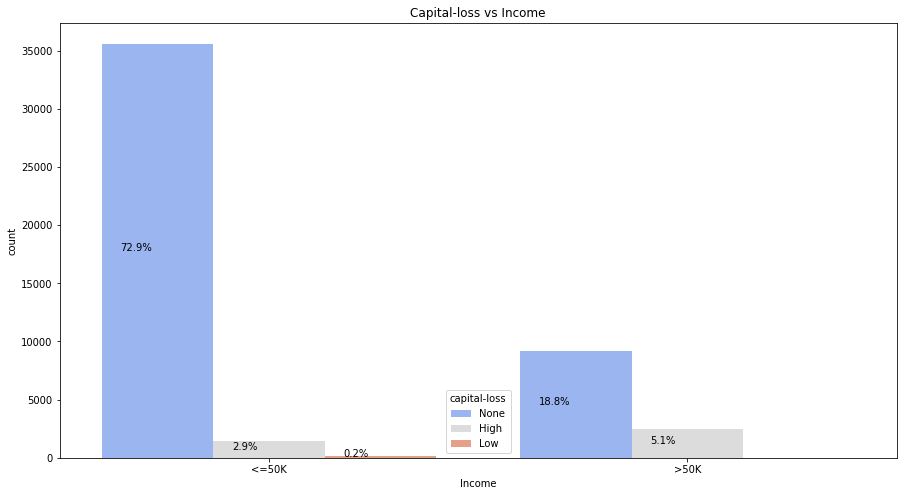

In [ ]:
plt.figure(figsize=[15,8])
ax = sn.countplot(binData['income'],palette='coolwarm',hue='capital-loss',data=Alldata)

plt.title('Capital-loss vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



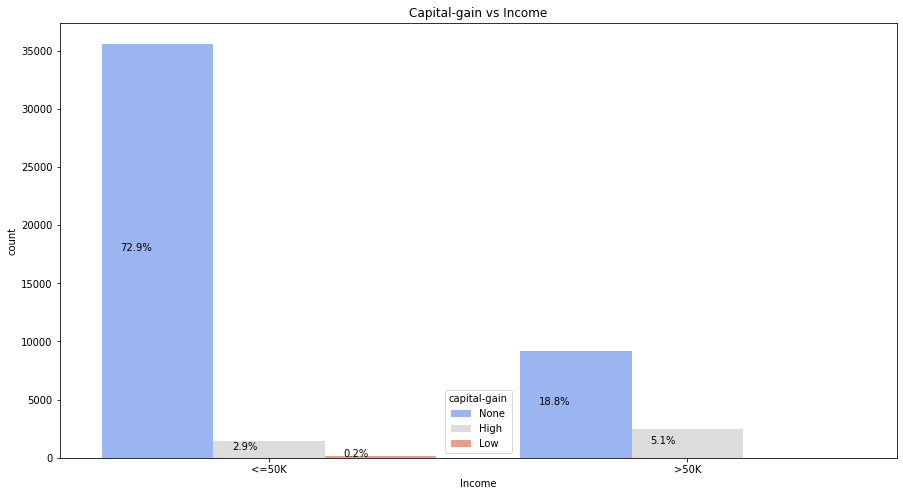

In [ ]:
plt.figure(figsize=[15,8])
ax = sn.countplot(binData['income'],palette='coolwarm',hue='capital-gain',data=Alldata)

plt.title('Capital-gain vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


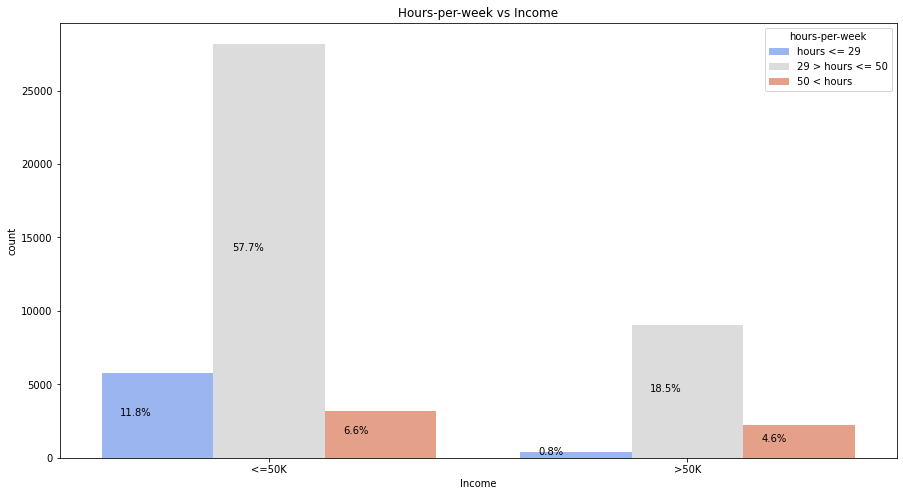

In [ ]:
plt.figure(figsize=[15,8])
ax = sn.countplot(binData['income'],palette='coolwarm',hue='hours-per-week',data=Alldata)

plt.title('Hours-per-week vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.savefig('hours.eps', bbox_inches='tight')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


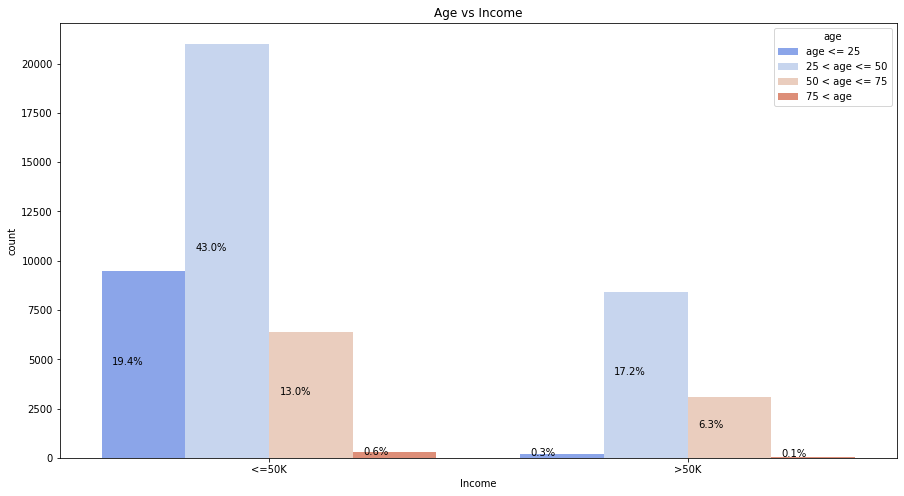

In [ ]:
plt.figure(figsize=[15,8])
ax = sn.countplot(binData['income'],palette='coolwarm',hue='age',data=Alldata)

plt.title('Age vs Income')
plt.xlabel('Income')

total = len(Alldata)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/len(ax.patches) 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.savefig('age.eps', bbox_inches='tight')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16275,25 < age <= 50,Private,215419,Bachelors,13,Separated,Prof-specialty,Not-in-family,White,Female,None,None,50 < hours,United-States,<=50K
16276,50 < age <= 75,Unknown,321403,HS-grad,9,Separated,Unknown,Other-relative,Black,Male,None,None,50 < hours,United-States,<=50K
16277,25 < age <= 50,Private,374983,Bachelors,13,Married,Prof-specialty,Husband,White,Male,None,None,50 < hours,United-States,<=50K
16278,25 < age <= 50,Private,83891,Bachelors,13,Separated,Adm-clerical,Own-child,Asian-Pac-Islander,Male,High,High,50 < hours,United-States,<=50K
16279,25 < age <= 50,Self-emp-inc,182148,Bachelors,13,Married,Exec-managerial,Husband,White,Male,None,None,NaN,United-States,>50K


In [ ]:
binData1.to_csv('newfile.csv', index=False) 

In [ ]:
df = pd.read_csv("newfile.csv")

In [ ]:
df1 = df.replace('Unknown',np.nan)
df1 = df1.replace('?',np.nan)
df1.isin([np.nan]).sum(axis=0)

#Removes 3620 instances which is 7.4 % 
df1.dropna(how='any',inplace=True)
df1.info()

#drop duplicates 
df1 = df1.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45220 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45220 non-null  object
 1   workclass       45220 non-null  object
 2   fnlwgt          45220 non-null  int64 
 3   education       45220 non-null  object
 4   education-num   45220 non-null  int64 
 5   marital-status  45220 non-null  object
 6   occupation      45220 non-null  object
 7   relationship    45220 non-null  object
 8   race            45220 non-null  object
 9   sex             45220 non-null  object
 10  capital-gain    45220 non-null  object
 11  capital-loss    45220 non-null  object
 12  hours-per-week  45220 non-null  object
 13  native-country  45220 non-null  object
 14  income          45220 non-null  object
dtypes: int64(2), object(13)
memory usage: 5.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44968 entries, 0 to 48839
Data columns (to

In [ ]:
sex = {'Male': 0,'Female': 1} 
income = {'<=50K':0,'>50K' : 1}
age = {'age <= 25': 0,'25 < age <= 50':1,'50 < age <= 75':2, '75 < age':3}
capitalG = {'None':0,'Low':1, 'High':2}
capitalL = {'None':0,'Low':1, 'High':2}
education = {'Not-Finished-With-School':0,'HS-grad':1,'Prof-school':2,'Assoc-acdm':3,'Assoc-voc':4,'Some-college':5,'Bachelors':6,'Masters':7,'Doctorate':8 }


hours = {'hours <= 29 ':0,'29 > hours <= 50':1,'50 < hours':3}

df1.sex = [sex[item] for item in df1.sex] 
df1.income = [income[item] for item in df1.income] 
df1.age = [age[item] for item in df1.age] 
df1['capital-gain'] = [capitalG[item] for item in df1['capital-gain']] 
df1['capital-loss']= [capitalL[item] for item in df1['capital-loss']] 
df1.education = [education[item] for item in df1.education] 
df1['hours-per-week'] = [hours[item] for item in df1['hours-per-week']]


ANN = df
ANN.sex = [sex[item] for item in ANN.sex] 
ANN.income = [income[item] for item in ANN.income] 
ANN.age = [age[item] for item in ANN.age] 
ANN['capital-gain'] = [capitalG[item] for item in ANN['capital-gain']] 
ANN['capital-loss']= [capitalL[item] for item in ANN['capital-loss']] 
ANN.education = [education[item] for item in ANN.education] 
ANN['hours-per-week'] = [hours[item] for item in ANN['hours-per-week']]



In [ ]:
df1.head()
ANN.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,Self-emp-not-inc,83311,6,13,Married,Exec-managerial,Husband,White,0,0,0,0,United-States,0
1,1,Private,215646,1,9,Separated,Handlers-cleaners,Not-in-family,White,0,0,0,1,United-States,0
2,2,Private,234721,0,7,Married,Handlers-cleaners,Husband,Black,0,0,0,1,United-States,0
3,1,Private,338409,6,13,Married,Prof-specialty,Wife,Black,1,0,0,1,Cuba,0
4,1,Private,284582,7,14,Married,Exec-managerial,Wife,White,1,0,0,1,United-States,0


In [ ]:
df2 = df1



nativecountry = df2['native-country'].unique().tolist()
nativecountryMapping = dict( zip(nativecountry,range(len(nativecountry))) )
df2.replace({'native-country': nativecountryMapping},inplace=True)


race = df2['race'].unique().tolist()
raceMapping = dict( zip(race,range(len(race))) )
df2.replace({'race': raceMapping},inplace=True)


relationship = df2['relationship'].unique().tolist()
relationshipMapping = dict( zip(relationship,range(len(relationship))) )
df2.replace({'relationship': relationshipMapping},inplace=True)

occupation  = df2['occupation'].unique().tolist()
occupationMapping = dict( zip(occupation ,range(len(occupation))) )
df2.replace({'occupation': occupationMapping},inplace=True)

maritalstatus  = df2['marital-status'].unique().tolist()
maritalstatusMapping = dict( zip(maritalstatus,range(len(maritalstatus))) )
df2.replace({'marital-status': maritalstatusMapping},inplace=True)


workclass  = df2['workclass'].unique().tolist()
workclassMapping = dict( zip(workclass ,range(len(workclass))) )
df2.replace({'workclass': workclassMapping},inplace=True)

print(df2)
df2.iloc[0:5, 3:5]

       age  workclass  fnlwgt  ...  hours-per-week  native-country  income
0        1          0   83311  ...               0               0       0
1        1          1  215646  ...               1               0       0
2        2          1  234721  ...               1               0       0
3        1          1  338409  ...               1               1       0
4        1          1  284582  ...               1               0       0
...    ...        ...     ...  ...             ...             ...     ...
48834    1          1  245211  ...               1               0       0
48835    1          1  215419  ...               1               0       0
48837    1          1  374983  ...               1               0       0
48838    1          1   83891  ...               1               0       0
48839    1          5  182148  ...               3               0       1

[44968 rows x 15 columns]


,education,education-num
0,6,13
1,1,9
2,0,7
3,6,13
4,7,14


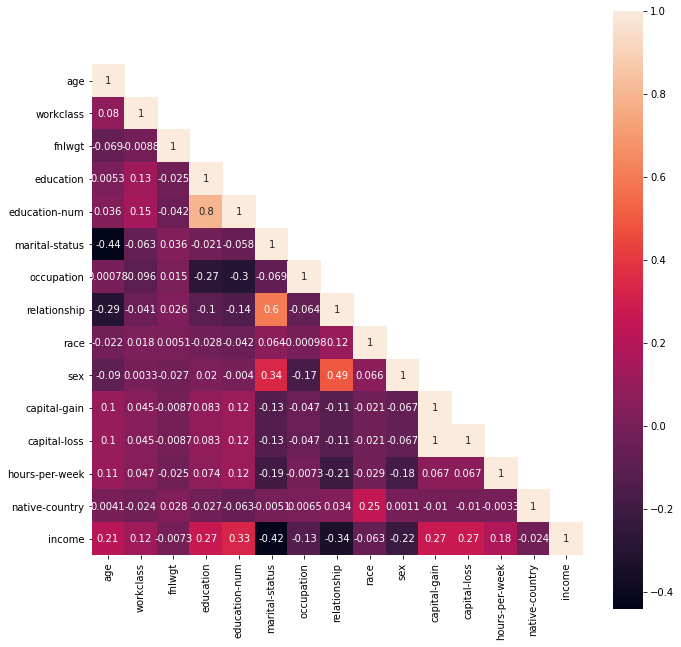

In [ ]:
corrMatrix = df2.corr()
df_lt = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))

f, ax = plt.subplots(figsize=(11, 11))
ax = sn.heatmap(df_lt, square=True, annot=True)

In [ ]:
df3 = df1




df3 = pd.get_dummies(data=df3, columns=['workclass', 'marital-status','occupation','relationship','race'])

df3.info()
df1['race']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44968 entries, 0 to 48839
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           44968 non-null  int64 
 1   fnlwgt                        44968 non-null  int64 
 2   education                     44968 non-null  int64 
 3   education-num                 44968 non-null  int64 
 4   sex                           44968 non-null  int64 
 5   capital-gain                  44968 non-null  int64 
 6   capital-loss                  44968 non-null  int64 
 7   hours-per-week                44968 non-null  int64 
 8   native-country                44968 non-null  object
 9   income                        44968 non-null  int64 
 10  workclass_Federal-gov         44968 non-null  uint8 
 11  workclass_Local-gov           44968 non-null  uint8 
 12  workclass_Private             44968 non-null  uint8 
 13  workclass_Self-e

0                     White
1                     White
2                     Black
3                     Black
4                     White
                ...        
48834                 White
48835                 White
48837                 White
48838    Asian-Pac-Islander
48839                 White
Name: race, Length: 44968, dtype: object

In [ ]:
income = df3['income']
df3 = df3.drop(columns='income')
df3['income'] = income

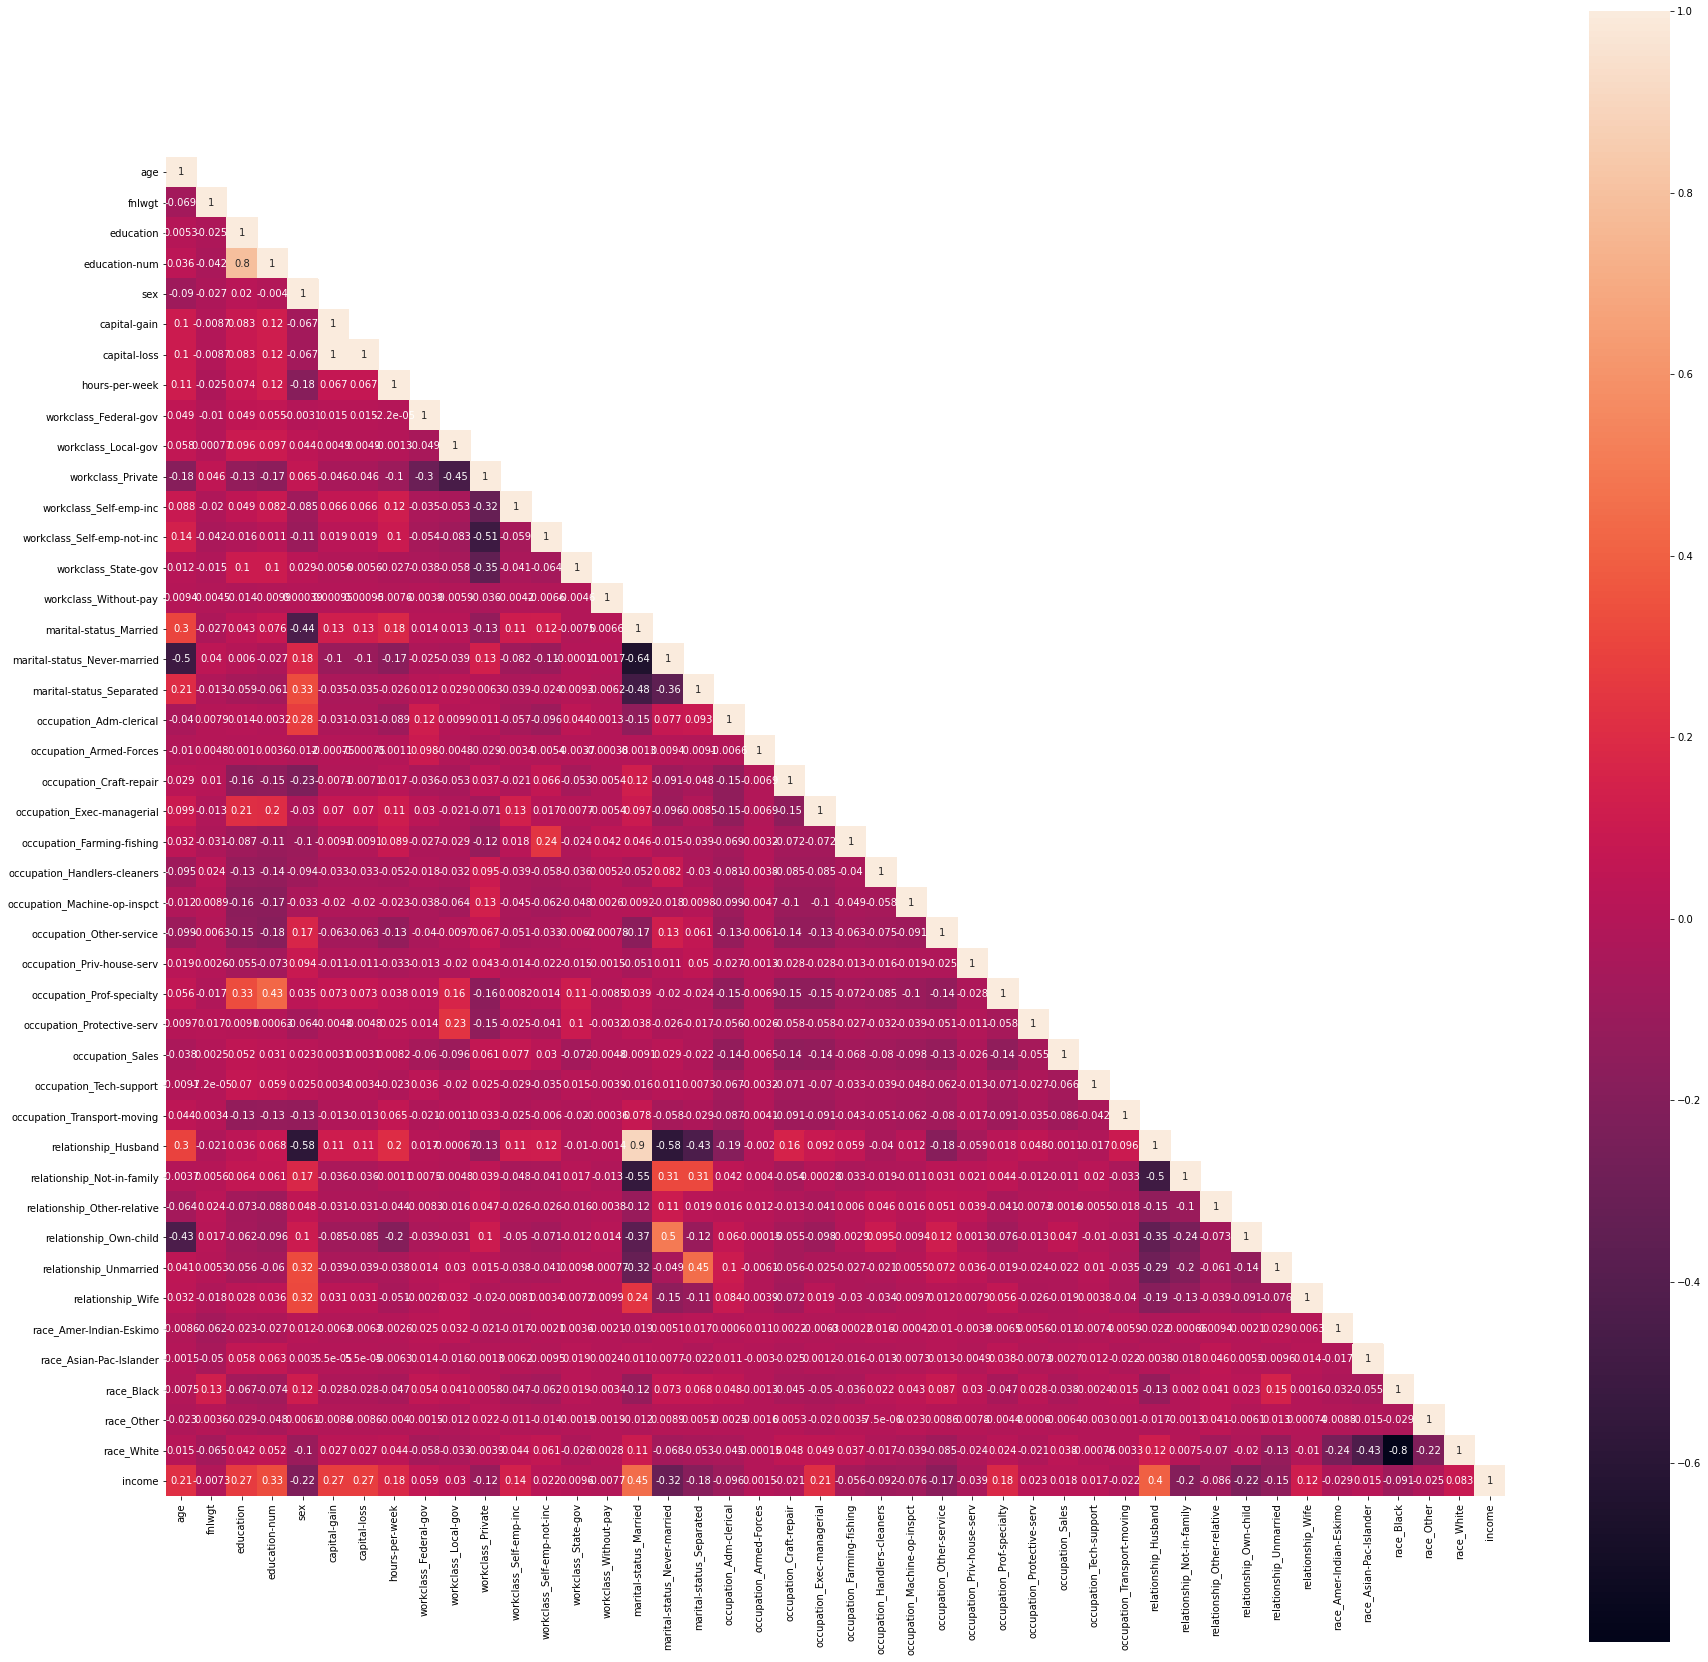

In [ ]:
corrMatrix = df3.corr()
df_lt = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))

f, ax = plt.subplots(figsize=(30, 30))
ax = sn.heatmap(df_lt, square=True, annot=True)

In [ ]:
df3.info()
data = df3.drop(columns=['fnlwgt','native-country','education-num'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44968 entries, 0 to 48839
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           44968 non-null  int64 
 1   fnlwgt                        44968 non-null  int64 
 2   education                     44968 non-null  int64 
 3   education-num                 44968 non-null  int64 
 4   sex                           44968 non-null  int64 
 5   capital-gain                  44968 non-null  int64 
 6   capital-loss                  44968 non-null  int64 
 7   hours-per-week                44968 non-null  int64 
 8   native-country                44968 non-null  object
 9   workclass_Federal-gov         44968 non-null  uint8 
 10  workclass_Local-gov           44968 non-null  uint8 
 11  workclass_Private             44968 non-null  uint8 
 12  workclass_Self-emp-inc        44968 non-null  uint8 
 13  workclass_Self-e

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44968 entries, 0 to 48839
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           44968 non-null  int64
 1   education                     44968 non-null  int64
 2   sex                           44968 non-null  int64
 3   capital-gain                  44968 non-null  int64
 4   capital-loss                  44968 non-null  int64
 5   hours-per-week                44968 non-null  int64
 6   workclass_Federal-gov         44968 non-null  uint8
 7   workclass_Local-gov           44968 non-null  uint8
 8   workclass_Private             44968 non-null  uint8
 9   workclass_Self-emp-inc        44968 non-null  uint8
 10  workclass_Self-emp-not-inc    44968 non-null  uint8
 11  workclass_State-gov           44968 non-null  uint8
 12  workclass_Without-pay         44968 non-null  uint8
 13  marital-status_Married        4

In [ ]:
data.info()

In [ ]:
data['income'] = data['income'].astype(str)
data.info()

In [ ]:
data1 = {'First':  [1, 2,3,4,5],
        'Second': [2, 4,6,8,10],
        'Third' : ['3','6','9','12','15']
        }

df = pd.DataFrame (data, columns = ['First','Second','Third'])

print(df.head())

x = df.drop(columns='Third')
y = df['Third']

dt_model = dt_c45(Xdata = x, ydata = y, pre_pruning = "impur", chi_lim = 0.3, min_lim = 10)

In [ ]:
data.to_csv('newfile1.csv', index=False) 

In [ ]:
data = pd.read_csv("newfile1.csv")

x = data.drop(columns='income')
y = data['income']

dt_model = dt_c45(Xdata = x, ydata = y, pre_pruning = "impur", chi_lim = 0.3, min_lim = 10)

NameError: ignored

In [ ]:
from sklearn import tree
import pandas as pd
from sklearn.metrics import accuracy_score

df1 = pd.read_csv("newfile1.csv")

x = df1.drop(columns=['income'])
y = df1['income']

clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=50, min_samples_leaf=100, min_weight_fraction_leaf=0.0,
 max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
#clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

#tree.plot_tree(clf) 

In [ ]:
yhat_test = clf.predict(x)
# Compute accuracy based on test samples
acc = accuracy_score(y, yhat_test)
print(acc)

0.825987368795588


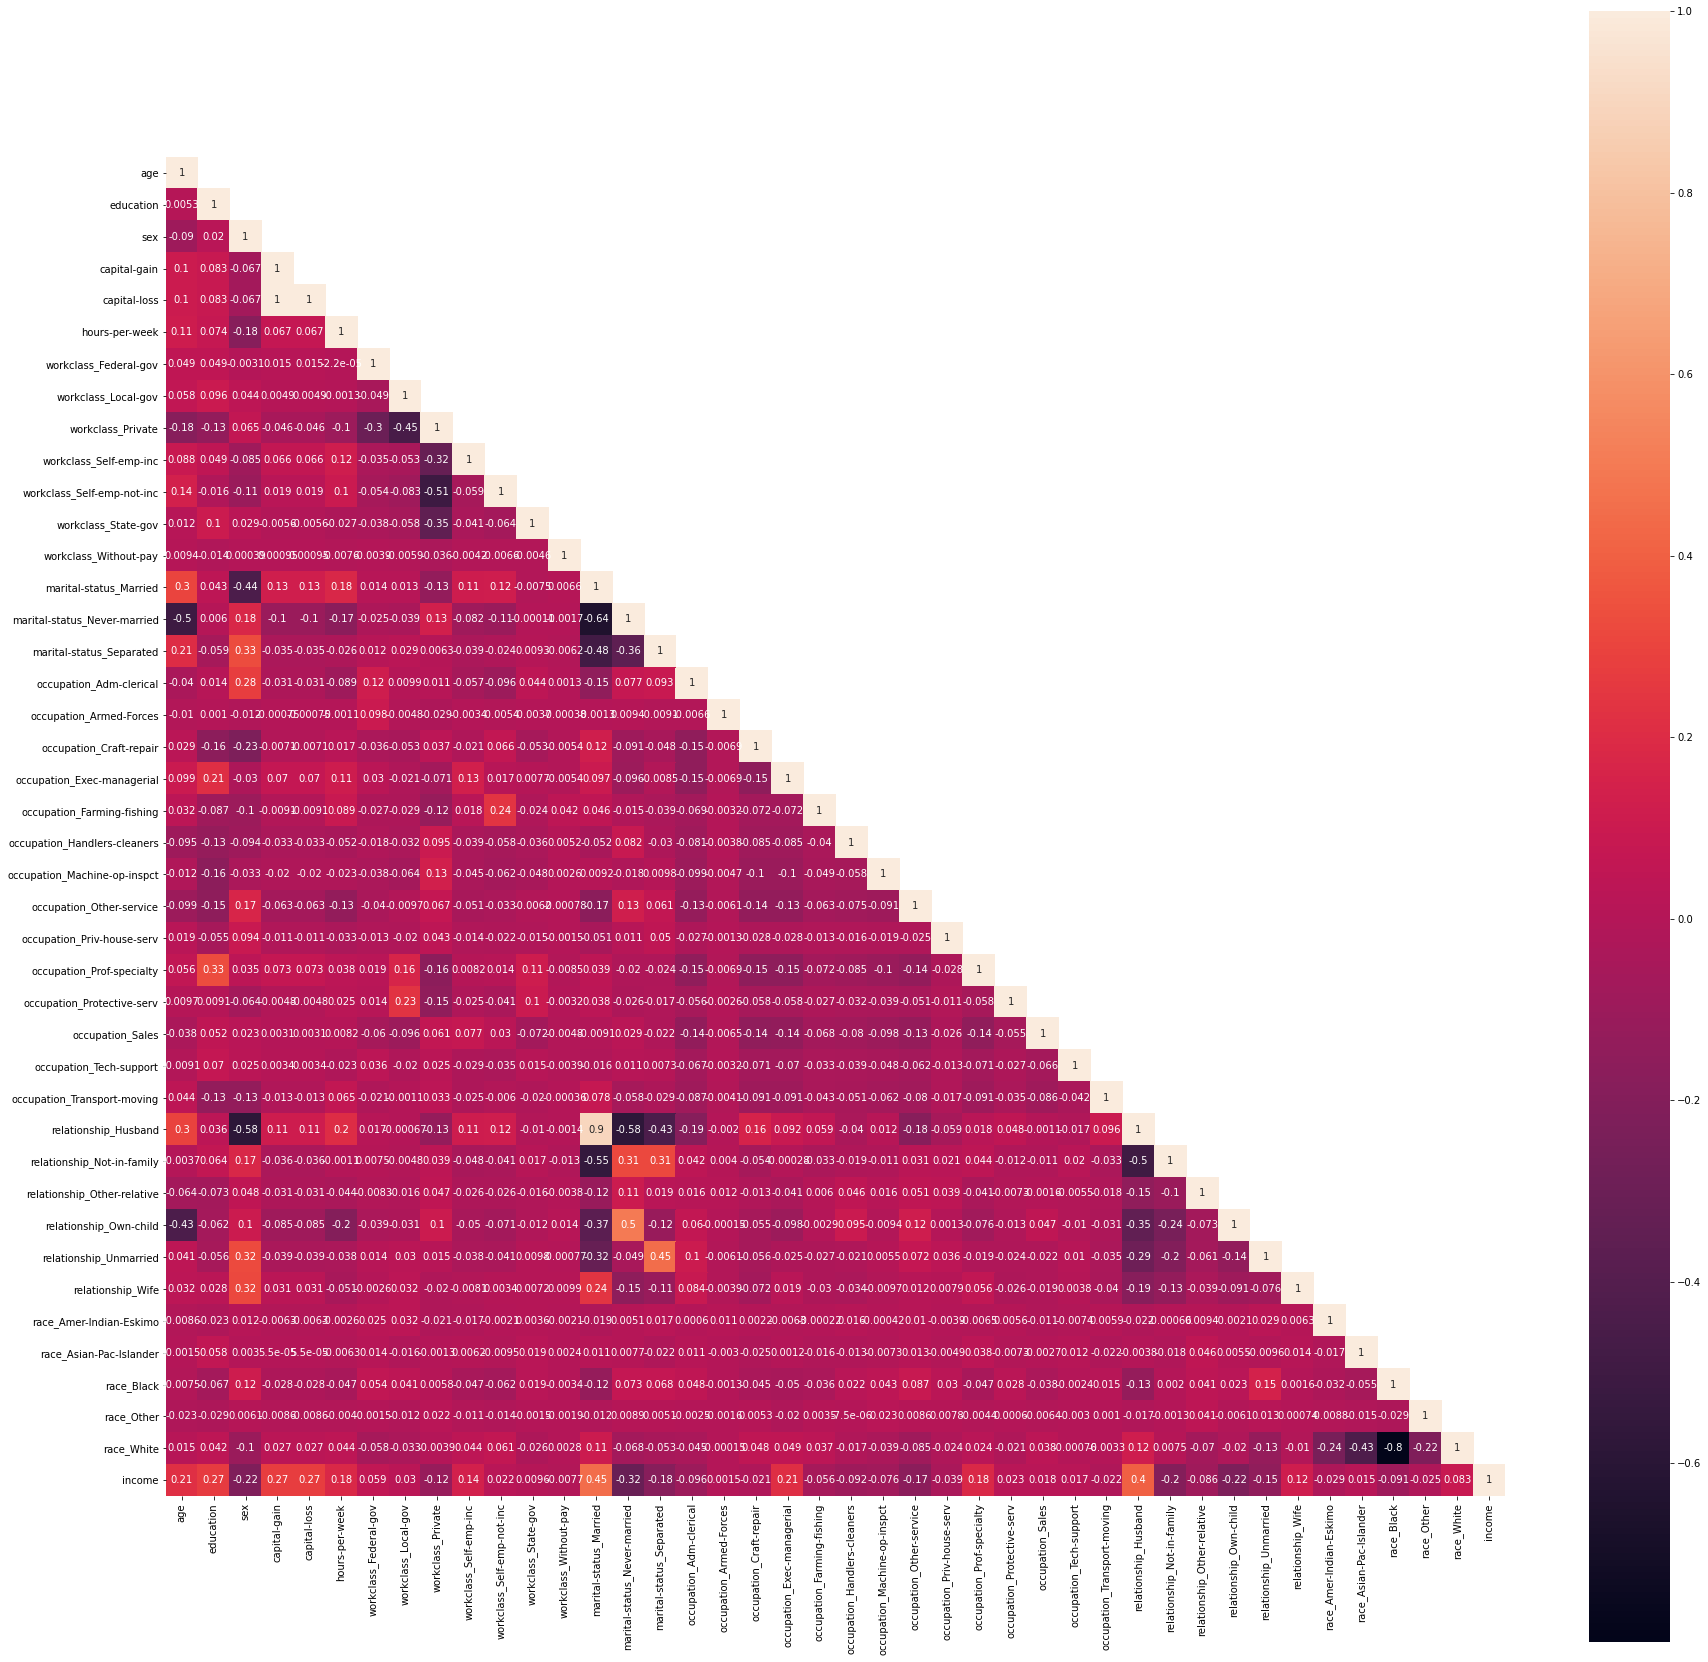

In [ ]:
corrMatrix = df1.corr()
df_lt = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))

f, ax = plt.subplots(figsize=(30, 30))
ax = sn.heatmap(df_lt, square=True, annot=True)
plt.savefig("one.eps", bbox_inches = 'tight')

In [ ]:
features_names = x.columns
print(features_names)
print(y)

Index(['age', 'education', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married',
       'marital-status_Never-married', 'marital-status_Separated',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_W

In [ ]:
#tree.plot_tree(clf) 
plt.figure(figsize=(200,100))
tree.plot_tree(clf,max_depth=None, feature_names=features_names, class_names=['<=50k','>50k'], label='all', filled=True, impurity=True, node_ids=True, proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)
plt.savefig('tree.eps')

In [ ]:
from sklearn.tree import export_text
df = x.columns
r = export_text(clf, feature_names= [i for i in features_names] )
print(r)


In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Adult") 

'Adult.pdf'

In [ ]:
dot_data1 = tree.export_graphviz(clf, out_file=None,feature_names=features_names,class_names,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data1)  
graph 


Error: <stdin>: syntax error in line 218 near ';'


CalledProcessError: ignored

In [ ]:
ANN.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,Self-emp-not-inc,83311,6,13,Married,Exec-managerial,Husband,White,0,0,0,0,United-States,0
1,1,Private,215646,1,9,Separated,Handlers-cleaners,Not-in-family,White,0,0,0,1,United-States,0
2,2,Private,234721,0,7,Married,Handlers-cleaners,Husband,Black,0,0,0,1,United-States,0
3,1,Private,338409,6,13,Married,Prof-specialty,Wife,Black,1,0,0,1,Cuba,0
4,1,Private,284582,7,14,Married,Exec-managerial,Wife,White,1,0,0,1,United-States,0


In [ ]:
ANN.to_csv('dfPred.csv',index=False)

In [ ]:
AData = pd.read_csv("dfPred.csv")
AData.head()




,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,Self-emp-not-inc,83311,6,13,Married,Exec-managerial,Husband,White,0,0,0,0,United-States,0
1,1,Private,215646,1,9,Separated,Handlers-cleaners,Not-in-family,White,0,0,0,1,United-States,0
2,2,Private,234721,0,7,Married,Handlers-cleaners,Husband,Black,0,0,0,1,United-States,0
3,1,Private,338409,6,13,Married,Prof-specialty,Wife,Black,1,0,0,1,Cuba,0
4,1,Private,284582,7,14,Married,Exec-managerial,Wife,White,1,0,0,1,United-States,0


In [ ]:
predOccupation = AData.loc[(AData['occupation'] == "Unknown")] 
WorkdataOcc = AData.loc[(AData['occupation'] != "Unknown")] 

In [ ]:
predOccupation.head()
WorkdataOcc.head()
WorkdataOcc['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5610
Sales                5504
Other-service        4923
Machine-op-inspct    3021
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
#WorkdataOcc = pd.get_dummies(data=WorkdataOcc, columns=['marital-status'])

In [ ]:
WorkdataOcc.head()
WorkdataOcc.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(WorkdataOcc, test_size=0.2)

In [ ]:
#train_x =  train[['education','sex','income','marital-status']]
train_x =  train.drop(columns= ['occupation','age','fnlwgt','race','native-country'])
train_y = train[['occupation']]

In [ ]:
print(train_x)

          workclass  education  ...  native-country income
19103       Private          1  ...   United-States      0
21954       Private          5  ...   United-States      0
29815  Self-emp-inc          1  ...   United-States      0
4822        Private          1  ...   United-States      0
13619       Private          1  ...   United-States      0
...             ...        ...  ...             ...    ...
38108       Private          1  ...   United-States      0
1496        Private          6  ...   United-States      0
38976     Local-gov          6  ...   United-States      0
44614       Private          1  ...   United-States      0
29069       Private          4  ...   United-States      0

[36824 rows x 12 columns]


In [ ]:
#test_x =  test[['education','sex','income','marital-status']]
test_x =  test.drop(columns = ['occupation','age','fnlwgt','race','native-country'])
test_y = test[['occupation']]

In [ ]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9207 entries, 175 to 34490
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9207 non-null   int64 
 1   workclass       9207 non-null   object
 2   fnlwgt          9207 non-null   int64 
 3   education       9207 non-null   int64 
 4   education-num   9207 non-null   int64 
 5   marital-status  9207 non-null   object
 6   relationship    9207 non-null   object
 7   race            9207 non-null   object
 8   sex             9207 non-null   int64 
 9   capital-gain    9207 non-null   int64 
 10  capital-loss    9207 non-null   int64 
 11  hours-per-week  9207 non-null   int64 
 12  native-country  9207 non-null   object
 13  income          9207 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [ ]:
#train_x = pd.get_dummies(data=train_x, columns=['marital-status','workclass','race','native-country','relationship'])
#test_x = pd.get_dummies(data=test_x, columns=['marital-status','workclass','race','native-country','relationship'])

train_x = pd.get_dummies(data=train_x, columns=['marital-status','workclass','relationship'])
test_x = pd.get_dummies(data=test_x, columns=['marital-status','workclass','relationship'])

In [ ]:
train_x.head()
print(test_x)
print(train_y)
print(test_y)

       education  education-num  ...  relationship_Unmarried  relationship_Wife
42369          3             12  ...                       0                  0
27295          0              7  ...                       0                  0
47675          5             10  ...                       1                  0
47598          6             13  ...                       0                  1
10540          5             10  ...                       0                  0
...          ...            ...  ...                     ...                ...
39291          6             13  ...                       0                  0
6716           1              9  ...                       0                  0
7697           5             10  ...                       0                  0
41130          6             13  ...                       0                  0
4076           1              9  ...                       0                  0

[9207 rows x 69 columns]
              

In [ ]:
train_y['occupation'].value_counts()
occupation = {'Craft-repair': 0, 'Prof-specialty': 1 ,'Exec-managerial' : 2,'Adm-clerical' :3,'Sales' :4,'Other-service': 5,'Machine-op-inspct' : 6,'Transport-moving' :7,'Handlers-cleaners' :8,
              'Farming-fishing' :9,'Tech-support'  :10,'Protective-serv' : 11,'Priv-house-serv' :12,'Armed-Forces' : 13}

train_y.occupation = [occupation[item] for item in train_y.occupation]
test_y.occupation = [occupation[item] for item in test_y.occupation]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
y = train_y.to_numpy()
x = train_x.to_numpy()

print(x)

[[ 1  9  1 ...  1  0  0]
 [ 5 10  0 ...  0  0  0]
 [ 1  9  0 ...  1  0  0]
 ...
 [ 6 13  0 ...  0  0  0]
 [ 1  9  0 ...  0  0  0]
 [ 4 11  1 ...  0  1  0]]


In [ ]:
x=x[:,1:]
print(x)

[[     1 102583      1 ...      0      0      0]
 [     1 498079      6 ...      0      1      0]
 [     0 177526      6 ...      0      0      0]
 ...
 [     1 143368      5 ...      0      0      0]
 [     1  79531      1 ...      0      0      0]
 [     1 144322      4 ...      0      0      0]]


In [ ]:
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as pp

scaler = StandardScaler().fit(train_x)
train_x = scaler.transform(train_x)
train_y = pp.label_binarize(train_y, classes=np.unique(train_y))

In [ ]:
#train_y.to_numpy()
print(train_y)
print(train_x)

[[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[-0.90952697 -0.44183494  1.44104635 ...  2.4204613  -0.34362926
  -0.22263275]
 [ 0.71683189 -0.05214057 -0.6939402  ... -0.41314439 -0.34362926
  -0.22263275]
 [-0.90952697 -0.44183494 -0.6939402  ...  2.4204613  -0.34362926
  -0.22263275]
 ...
 [ 1.1234216   1.11694257 -0.6939402  ... -0.41314439 -0.34362926
  -0.22263275]
 [-0.90952697 -0.44183494 -0.6939402  ... -0.41314439 -0.34362926
  -0.22263275]
 [ 0.31024217  0.33755381  1.44104635 ... -0.41314439  2.91011306
  -0.22263275]]


In [ ]:

model = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(23,)),
                              tf.keras.layers.Dense(144,use_bias=True,bias_initializer='ones', activation='relu'),
                              tf.keras.layers.Dense(144,use_bias=True,bias_initializer='ones', activation='relu'),
                              tf.keras.layers.Dense(144,use_bias=True,bias_initializer='ones', activation='relu'),
                              tf.keras.layers.Dense(14, activation='softmax'),
       ])

#print(test_y[0])



model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

model.fit(train_x, train_y, epochs = 100,validation_split=0.1, validation_data= None) 

Epoch 1/100
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0589 - accuracy: 0.2961 - val_loss: 0.0571 - val_accuracy: 0.3204
Epoch 2/100
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0569 - accuracy: 0.3208 - val_loss: 0.0565 - val_accuracy: 0.3266
Epoch 3/100
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0566 - accuracy: 0.3274 - val_loss: 0.0567 - val_accuracy: 0.3057
Epoch 4/100
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0564 - accuracy: 0.3310 - val_loss: 0.0563 - val_accuracy: 0.3258
Epoch 5/100
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0563 - accuracy: 0.3324 - val_loss: 0.0561 - val_accuracy: 0.3310
Epoch 6/100
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0561 - accuracy: 0.3343 - val_loss: 0.0561 - val_accuracy: 0.3467
Epoch 7/100
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0560 - accuracy: 0.3339 - val_loss: 0.0560 - val_ac

In [ ]:


 



'''
#Create dummy variables 
#country = pd.get_dummies(Workdata['native-country'], prefix='native-country')
#sex = pd.get_dummies(Workdata['sex'], prefix='sex')
race = pd.get_dummies(Workdata['race'], prefix='race')
relationship = pd.get_dummies(Workdata['relationship'], prefix='relationship')
#occupation = pd.get_dummies(Workdata['occupation'], prefix='occupation')
maritalstatus = pd.get_dummies(Workdata['marital-status'], prefix='marital-status')
education = pd.get_dummies(Workdata['education'], prefix='education')
#workclass = pd.get_dummies(Workdata['workclass'], prefix='workclass')
#income = pd.get_dummies(Workdata['income'], prefix='income')
#Workdata =  pd.concat([race,relationship,maritalstatus,education])
race = race.to_numpy()
relationship = relationship.to_numpy()
maritalstatus = maritalstatus.to_numpy()
education = education.to_numpy()


#Create one hot encoding 
#Workdata['native-country'] = country[country.columns].values
#Workdata['sex'] = sex[sex.columns].values.tolist()
Workdata['race'] = race[race.columns].values.tolist()
#Workdata['race'] = race
Workdata['relationship'] = relationship[relationship.columns].values.tolist()
#Workdata['relationship'] = relationship
#Workdata['occupation'] = occupation[occupation.columns].values.tolist()
Workdata['marital-status'] = maritalstatus[maritalstatus.columns].values.tolist()
#Workdata['marital-status'] = maritalstatus
Workdata['education'] = education[education.columns].values.tolist()
#Workdata['education'] = education
#Workdata['workclass'] = workclass[workclass.columns].values
#Workdata['income'] = income[income.columns].values.tolist()
'''
predCountry = Workdata.loc[(Workdata['native-country'] == "?")] 
 
WorkdataNew = Workdata.loc[(Workdata['native-country'] != "?")] 



train, test = train_test_split(WorkdataNew, test_size=0.2)

train_x =  train.loc[:, train.columns != 'native-country'].to_numpy()
train_y = train['native-country'].to_numpy()



test_x =  test.loc[:, test.columns != 'native-country'].to_numpy()
test_y = test['native-country'].to_numpy()



model = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(42,)),
                              tf.keras.layers.Dense(10,use_bias=True,bias_initializer='ones', activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid'),
       ])

#print(test_y[0])



model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

model.fit(train_x, train_y, epochs = 100,validation_split=0.1, validation_data= None) 


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


(47983,)
70    0
70    0
Name: native-country, dtype: int64
[0 0 4 ... 0 0 3]
Epoch 1/100
1080/1080 [==============================] - 1s 1ms/step - loss: 24.8764 - accuracy: 0.9136 - val_loss: 22.5092 - val_accuracy: 0.9161
Epoch 2/100
1080/1080 [==============================] - 1s 1ms/step - loss: 24.8764 - accuracy: 0.9136 - val_loss: 22.5092 - val_accuracy: 0.9161
Epoch 3/100
1080/1080 [==============================] - 1s 1ms/step - loss: 24.8764 - accuracy: 0.9136 - val_loss: 22.5092 - val_accuracy: 0.9161
Epoch 4/100
1080/1080 [==============================] - 1s 1ms/step - loss: 24.8764 - accuracy: 0.9136 - val_loss: 22.5092 - val_accuracy: 0.9161
Epoch 5/100
1080/1080 [==============================] - 1s 1ms/step - loss: 24.8764 - accuracy: 0.9136 - val_loss: 22.5092 - val_accuracy: 0.9161
Epoch 6/100
1080/1080 [==============================] - 1s 1ms/step - loss: 24.8764 - accuracy: 0.9136 - val_loss: 22.5092 - val_accuracy: 0.9161
Epoch 7/100
1080/1080 [=================